In [1]:
%run kmeans

In [2]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image

# Kmeans Algorithm

- **What is Kmeans?**  
    - Kmeans is an unsupervised algorithms making inferences from datasets using only input without referring to labels. Kmeans group similar data points together and discover underlying patterns. 
    - Here K stands for how many group you want data to be categorized into and 'means' refers to centroids of the data, as centroids are averaged by all the observation from that cluster.
    
- **How Kmeans work?**
    - **Initialization:** 
        - Firstly, k centroids is selected from the data. For centroids = 'None', the k centroids are randomly selected but for centroids = 'kmeans++', except for the first randomly selected point, other k-1 points are selected based on distance to previous centroids. There are drawbacks for randomly pick centroids to start with, one of them is the randomness of initialization may give not as good result. For "kmeans++" method, after we pick the first point, the next k-1 points are selected by maximizing the minimum distance to all existing cluster centroids.
    - **Steps:**
        - For every observation, find the closest centroid
        - Add this observation to the corresponding cluster
        - After computation for all the obseravations in X, recompute centroids. 
        - If compared to the last round, cluster don't change, then stop and return cluster and centroids, else continue.

kmeans.png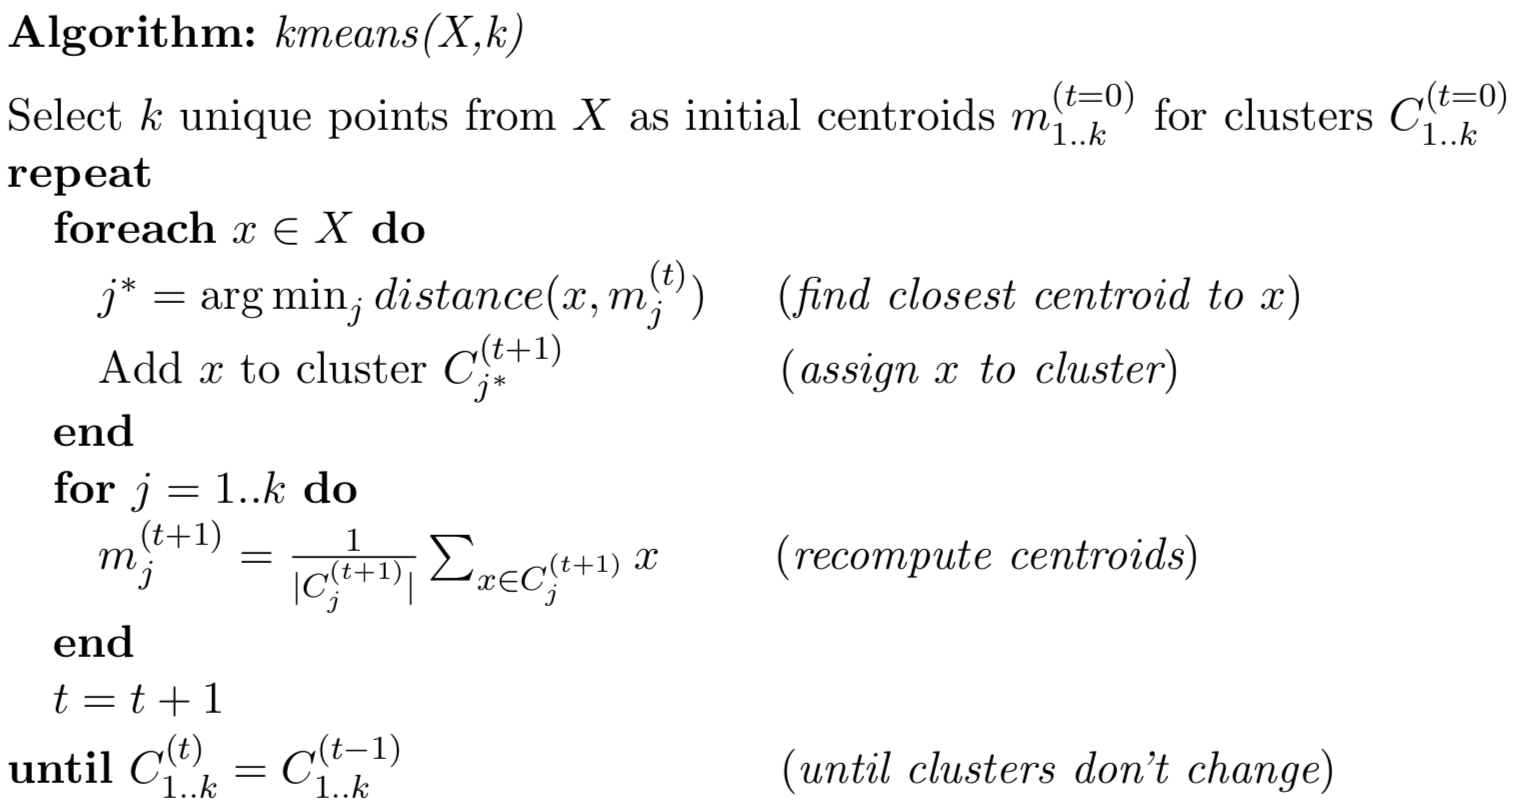

- It's very important to do all the calculation using numpy, especailly for distance calculation, it saves me 10x time in all. I realize that to imagine all the calculation from a matrix perspective and avoid using list, dict and tuple is  quite useful. 
    - I calculate the distance of x ndarray and y ndarray by computing x^2, y^2,x*y so I can do x^2+y^2-2xy.
    - Also, using np.argmax, np.argmin.

# Kmeans application: Clustering

## Example 1: Cluster cancer or begine for sklearn's cancer dataset

In [3]:
from sklearn.datasets import *
from sklearn.metrics import *

In [4]:
# Load data
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target

In [5]:
# Get centroids and cluster
# Note: here cluster_idx means the corresponding cluster index for each of the observation
# The commmented line in kmeans.py can generate "real data cluster"
centroids, cluster_idx = kmeans(X, k=2, centroids = 'kmeans++', tolerance = 1e-2)

In [6]:
# In my algorithm the label for begine and cancer is just opposite as sklearn
# so I need to flip in order they are matched for evaluation
flipped = np.where((cluster_idx==0)|(cluster_idx==1), cluster_idx^1, cluster_idx)

In [7]:
print(confusion_matrix(Y,flipped))
print("accuracy %.4f" %accuracy_score(Y, flipped))

[[130  82]
 [  1 356]]
accuracy 0.8541


# Kmeans application: Image compression

In [8]:
def read_image(path):
    """Read image and convert to nparray, show image
       Input: file path
       Output: nparray that has pixels information, dimension number(indication of color/greyscale), width and height"""
    image = Image.open(path)
    pixels = np.array(image)
    dim = len(pixels.shape)
    plt.figure(figsize=(10,10))
    if dim == 3:
        plt.imshow(image)
        plt.show()
        row, col, channel = pixels.shape
        pixels = np.reshape(pixels, (row * col, 3))
    elif dim == 2:
        plt.imshow(image,cmap="gray")
        plt.show()
        row,col = pixels.shape
        pixels = np.reshape(pixels, (row*col,1))
    return pixels, dim, row, col

In [9]:
def generate_image(centroids, cluster_idx, col, row, dim, filename):
    """Replace pixels with corresponding centroid pixel, convert compressed pixels numpy array back to image
       Input: """
    transformed_pixels = centroids[cluster_idx]
    transformed_pixels_uint8 = transformed_pixels.astype("uint8")
    plt.figure(figsize=(10,10))
    if dim == 3:
        transformed_pixels_reshaped = np.reshape(transformed_pixels_uint8, (row, col, 3), "C")
        transform_back = Image.fromarray(transformed_pixels_reshaped)
        plt.imshow(transform_back)
        plt.show()
    elif dim == 2:
        transformed_pixels_reshaped = np.reshape(transformed_pixels_uint8, (row, col), "C")
        transform_back = Image.fromarray(transformed_pixels_reshaped)
        plt.imshow(transform_back, cmap="gray")
        plt.show()
    transform_back.save(filename)

## Example 2: Compress color image to only 32 colors

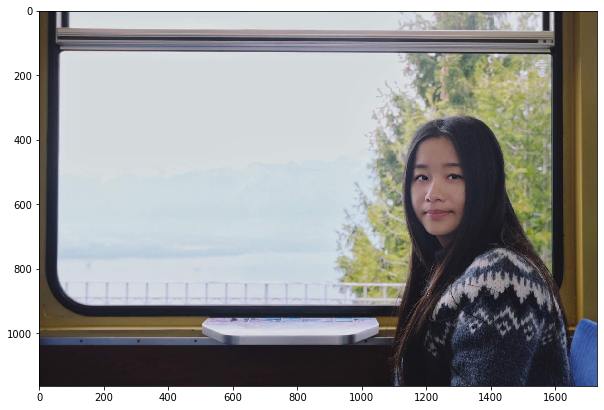

In [10]:
pixels, dim, row, col = read_image('jingxian_swiss.jpg')

In [11]:
centroids, cluster_idx = kmeans(X = pixels, k = 32, centroids='kmeans++', tolerance=1e-2)

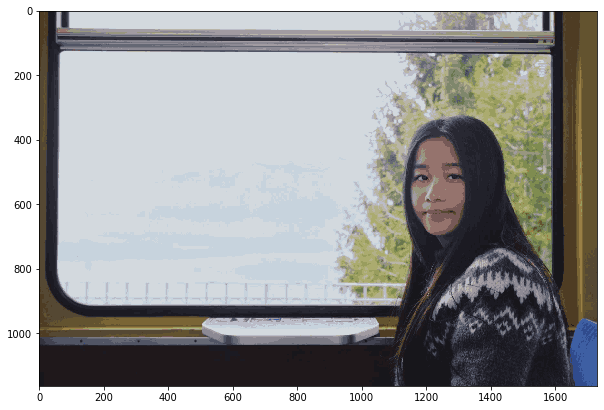

In [12]:
generate_image(centroids, cluster_idx, col, row, dim, 'jingxian_swiss-compressed32.jpg')

## Example 2: Compress color image to only 32 colors

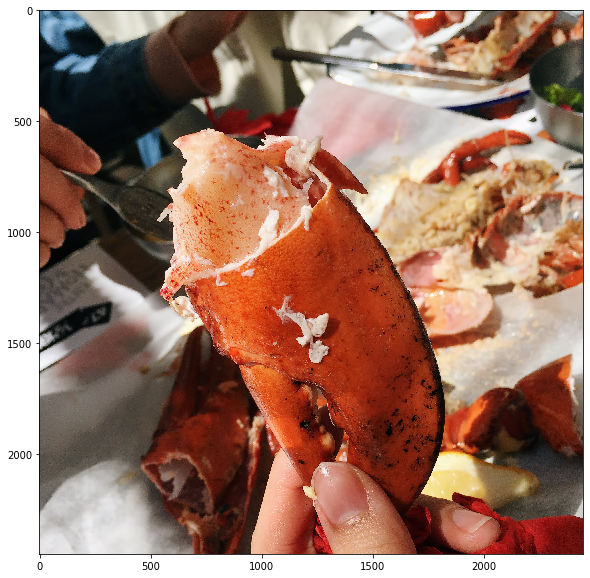

In [18]:
pixels, dim, row, col = read_image('lobster.jpg')

In [19]:
centroids, cluster_idx = kmeans(X = pixels, k = 32, centroids='kmeans++', tolerance=1e-2)

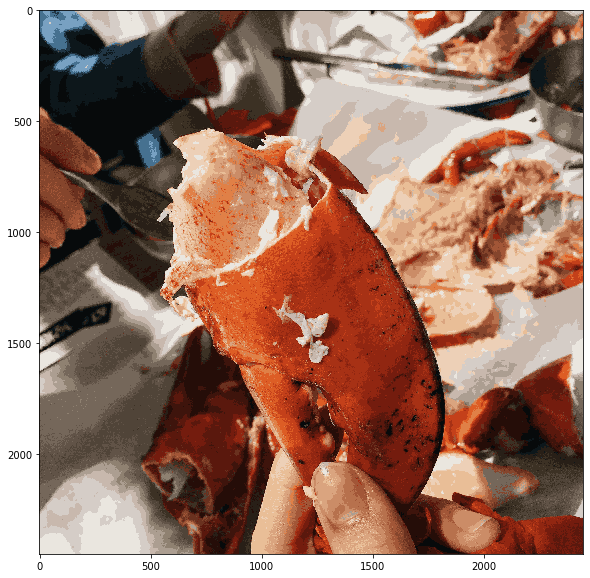

In [20]:
generate_image(centroids, cluster_idx, col, row, dim, 'lobster-compressed32.jpg')

## Example 3: Compress greyscale  image to only 4 colors

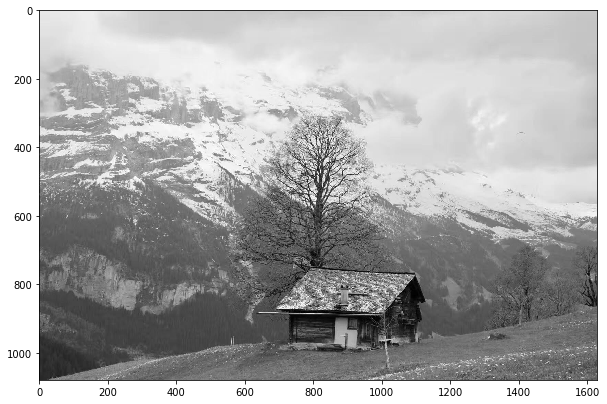

In [21]:
pixels, dim, row, col = read_image('first_mountain.jpg')

In [22]:
centroids, cluster_idx = kmeans(X = pixels, k = 4, centroids='kmeans++', tolerance=1e-2)

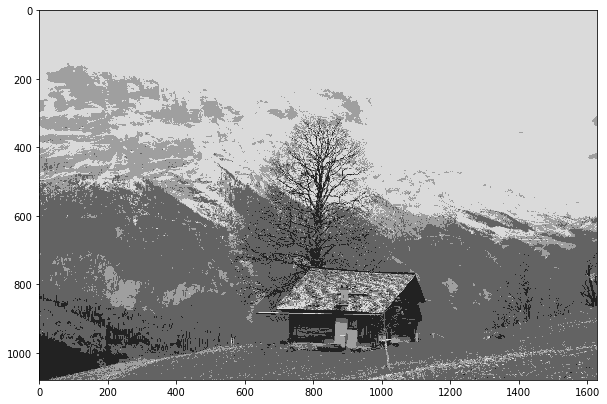

In [23]:
generate_image(centroids, cluster_idx, col, row, dim, 'first_mountain-compressed4.jpg')

# Spectral Clustering

In [24]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import *

In [25]:
# Load data
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target

In [26]:
# Calculate similarity matrix and use it to do spectral clustering
cosine = cosine_similarity(X)
cluster = SpectralClustering(n_clusters=2, affinity='precomputed',gamma = 1.0)
prediction = cluster.fit_predict(cosine)
print("confusion matrix:")
print(confusion_matrix(Y,prediction))
print("accuracy %.4f" %accuracy_score(Y, prediction))

confusion matrix:
[[ 61 151]
 [351   6]]
accuracy 0.1178
